# **Doctor patient conversation dataset analysis and models**


In [ ]:
import pandas as pd
import csv
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Skip problematic lines
data = pd.read_csv("gpt-4.csv", engine='python', on_bad_lines='skip')


In [ ]:
data.head(3000)

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."
...,...,...
2995,A 43-year-old female with dyspnoea was transfe...,Doctor: Good afternoon. You were transferred t...
2996,A 63-year-old female presented in 2016 with pa...,"Doctor: Hello, how are you feeling today?\nPat..."
2997,"A 72 year old female, with no significant past...","Doctor: Good morning, how are you feeling toda..."
2998,A 32-year-old female at pregnancy week 22 was ...,"Doctor: Hello, how are you feeling today?\nPat..."


In [ ]:
df = data.sample(n=1000)
df.isnull().sum()

,0
data,0
conversation,0


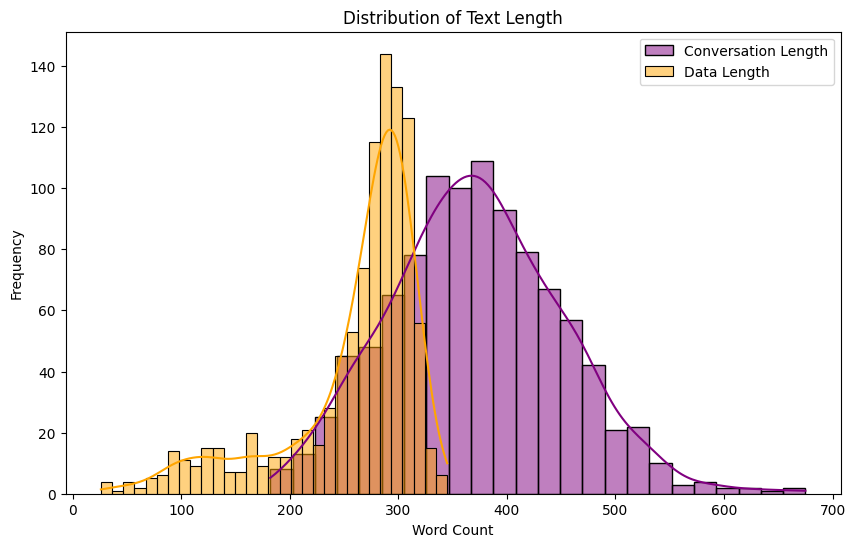

In [ ]:
# Text Length Analysis
df['conversation_length'] = df['conversation'].apply(lambda x: len(x.split()))  # Word count for conversation
df['data_length'] = df['data'].apply(lambda x: len(x.split()))  # Word count for data

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['conversation_length'], kde=True, color='purple', label='Conversation Length')
sns.histplot(df['data_length'], kde=True, color='orange', label='Data Length')
plt.legend()
plt.title('Distribution of Text Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

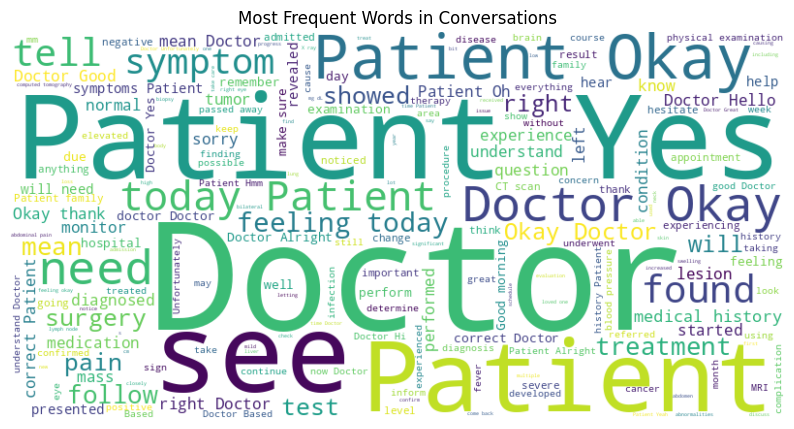

In [ ]:
# Word Cloud for Most Frequent Words in 'conversation'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['conversation'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Conversations')
plt.show()

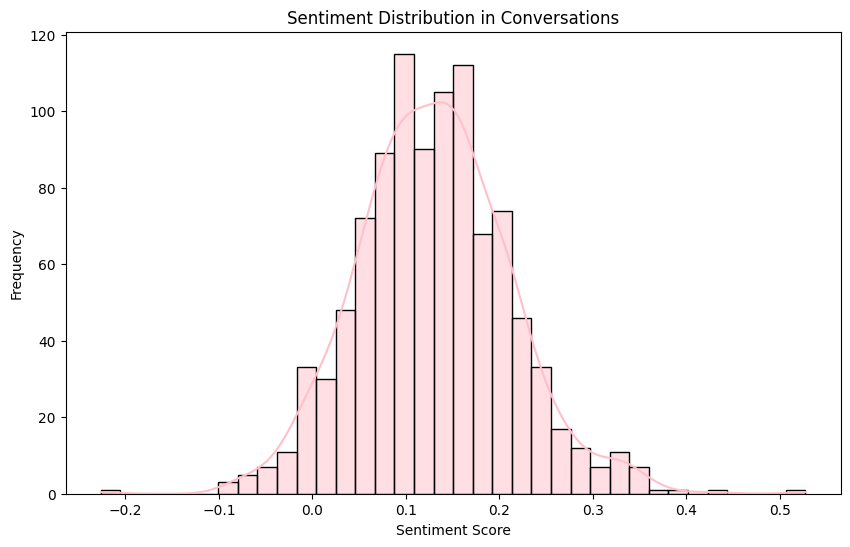

In [ ]:
from textblob import TextBlob
df['sentiment'] = df['conversation'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='pink')
plt.title('Sentiment Distribution in Conversations')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
most_positive_data = df.loc[df['sentiment'].idxmax()]['data']
most_negative_data = df.loc[df['sentiment'].idxmin()]['data']
print("\nMost Positive Data Sample:\n", most_positive_data)
print("\nMost Negative Data Sample:\n", most_negative_data)


Most Positive Data Sample:
 A 43-year-old female patient underwent skin-sparing mastectomy (Fig. ). A pedicled TRAM flap was performed to reconstruct the breast mound, and a modified C-H flap was used for the 1-stage nipple reconstruction. No complications were observed. The final height of the reconstructed nipple was similar to that of the contralateral nipple.

Most Negative Data Sample:
 On 2 May 2012, a 29-year-old male farmer from Underberg was admitted to a hospital in Pietermaritzburg, KZN. The patient reported contact with a stray puppy some two months before the onset of symptoms. The patient provided shelter for the puppy, but after a few days the animal developed symptoms which in retrospect could have been considered consistent with rabies. The dog subsequently died and was buried on the farm. After consideration of the patient history, rabies was deemed likely. Saliva, skin and cerebrospinal fluid (CSF) were collected over the course of his illness and sent to the NICD-N

In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm

# **NLP-related preprocessing tasks**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Drop rows with missing conversations
df = df.dropna(subset=['conversation'])

def preprocess_with_nltk(text):
    # Fallback tokenization
    tokens = text.lower().split()

    # Lemmatize, remove stopwords, and keep only alphabetic tokens
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words and word.isalpha()
    ]

    return " ".join(cleaned_tokens)


df['preprocessed_data'] = df['data'].apply(preprocess_with_nltk)
# Apply preprocessing and create a new column
df['preprocessed_conversation'] = df['conversation'].apply(preprocess_with_nltk)

# Set display options to avoid truncation
pd.set_option('display.max_colwidth', None)

print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head(5)

,data,conversation,conversation_length,data_length,sentiment,preprocessed_data,preprocessed_conversation
576,"A 50-year-old man underwent live laparoscopic donor nephrectomy (LLDN), through transperitoneal approach, on his left kidney as a donor for his sister. This procedure went uneventful and the patient was discharged 3 days after surgery. However, within one week after the procedure the patient experienced pain at the left side of the scrotum and left upper leg. During physical examination, a hypersensitive scrotum (allodynia) was noted whereas no other abnormalities were seen. The urologist was consulted but no urologic complications were found. The neuropathic pain area befitted the genitofemoral nerve (GFN). Conservative treatment was initiated with neuroleptic drugs and blocks of the L1/L2 dorsal roots with local anaesthetics and pulsed radiofrequency lesioning. These treatments did not result in significant pain relief and he could not work. Three years after the start of the neuropathic pain, operative treatment aiming at pain relief was initiated. In a multidisciplinary meeting it was concluded that a nerve entrapment of the GFN was suspected to be the most likely cause of the patient's neuropathic pain. Eventually, an exploratory transperitoneal laparoscopy was performed. After extensive adhesiolysis, a hemoclip used for closure of the ureter at the time of nephrectomy was identified in close relation to the GFN and removed. Due to the local scarring it could not be surgically assessed to which extent the GFN was actually damaged or a neuroma was formed. It seemed, however, highly likely that the pain originated from the GFN in this area. We therefore cut the GFN proximally in a normal looking segment (). Pathological analysis of the tissue confirmed this to contain nerve tissue. Within 2 weeks following surgery, the patient was completely pain-free and could return to his normal activities.","Doctor: Hi, Mr. Smith. How are you feeling today?\nPatient: Hmm, not so great, doctor. My left side of the scrotum and upper leg have been in pain for a while now.\nDoctor: I see. Can you tell me more about the pain? When did it start?\nPatient: It started about a week after I had a laparoscopic donor nephrectomy surgery for my sister.\nDoctor: Okay, I see. And were you discharged from the hospital after the procedure?\nPatient: Yes, I was discharged three days after the surgery.\nDoctor: During the physical examination, were any abnormalities found?\nPatient: No, but my scrotum was hypersensitive to touch (allodynia).\nDoctor: I see. We consulted a urologist, but no urologic complications were found. We started you on some neuroleptic drugs and blocks of the L1/L2 dorsal roots with local anaesthetics for treatment. Did you feel any pain relief?\nPatient: No, not really. I still couldn't work because of the pain.\nDoctor: After three years of neuropathic pain, we suspected a nerve entrapment of the genitofemoral nerve (GFN) was the cause. We performed an exploratory laparoscopy and found a hemoclip used for closure of the ureter at the time of nephrectomy was in close relation to the GFN.\nPatient: Oh wow, I had no idea.\nDoctor: Yes, due to the local scarring, we couldn't assess the nerve damage. We cut the GFN proximally in a normal looking segment and confirmed through pathological analysis that nerve tissue was present. Within 2 weeks following surgery, you were completely pain-free and could return to your normal activities.\nPatient: That's amazing, doctor. Thank you so much for your help.\nDoctor: Of course, Mr. Smith. Please come in for a follow-up appointment in a few weeks to make sure everything is still okay.",294,282,0.185227,man underwent live laparoscopic donor nephrectomy transperitoneal left kidney donor procedure went uneventful patient discharged day within one week procedure patient experienced pain left side scrotum left upper physical hypersensitive scrotum noted whereas abnormality urologist consulted 

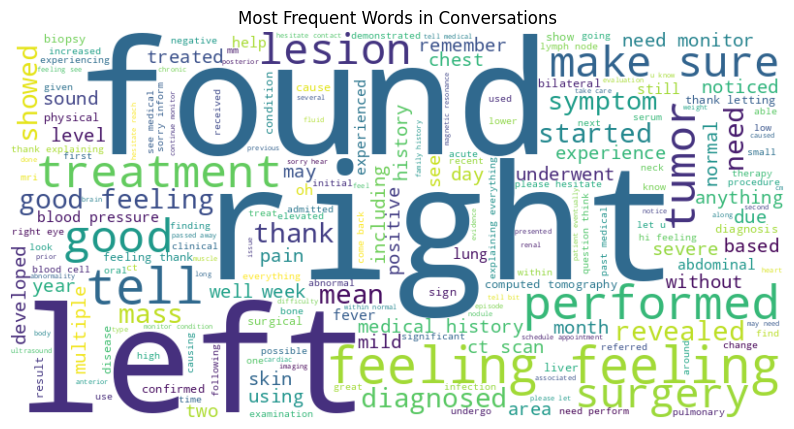

In [ ]:
# Word Cloud for Most Frequent Words in 'preprocessed_conversation'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['preprocessed_conversation'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Conversations')
plt.show()

# **Exploratory Data Analysis (EDA)**

In [ ]:
df[['data', 'conversation', 'preprocessed_data', 'preprocessed_conversation']].describe()

,data,conversation,preprocessed_data,preprocessed_conversation
count,1000,1000,1000,1000
unique,1000,1000,1000,1000
top,"A 50-year-old man underwent live laparoscopic donor nephrectomy (LLDN), through transperitoneal approach, on his left kidney as a donor for his sister. This procedure went uneventful and the patient was discharged 3 days after surgery. However, within one week after the procedure the patient experienced pain at the left side of the scrotum and left upper leg. During physical examination, a hypersensitive scrotum (allodynia) was noted whereas no other abnormalities were seen. The urologist was consulted but no urologic complications were found. The neuropathic pain area befitted the genitofemoral nerve (GFN). Conservative treatment was initiated with neuroleptic drugs and blocks of the L1/L2 dorsal roots with local anaesthetics and pulsed radiofrequency lesioning. These treatments did not result in significant pain relief and he could not work. Three years after the start of the neuropathic pain, operative treatment aiming at pain relief was initiated. In a multidisciplinary meeting it was concluded that a nerve entrapment of the GFN was suspected to be the most likely cause of the patient's neuropathic pain. Eventually, an exploratory transperitoneal laparoscopy was performed. After extensive adhesiolysis, a hemoclip used for closure of the ureter at the time of nephrectomy was identified in close relation to the GFN and removed. Due to the local scarring it could not be surgically assessed to which extent the GFN was actually damaged or a neuroma was formed. It seemed, however, highly likely that the pain originated from the GFN in this area. We therefore cut the GFN proximally in a normal looking segment (). Pathological analysis of the tissue confirmed this to contain nerve tissue. Within 2 weeks following surgery, the patient was completely pain-free and could return to his normal activities.","Doctor: Hi, Mr. Smith. How are you feeling today?\nPatient: Hmm, not so great, doctor. My left side of the scrotum and upper leg have been in pain for a while now.\nDoctor: I see. Can you tell me more about the pain? When did it start?\nPatient: It started about a week after I had a laparoscopic donor nephrectomy surgery for my sister.\nDoctor: Okay, I see. And were you discharged from the hospital after the procedure?\nPatient: Yes, I was discharged three days after the surgery.\nDoctor: During the physical examination, were any abnormalities found?\nPatient: No, but my scrotum was hypersensitive to touch (allodynia).\nDoctor: I see. We consulted a urologist, but no urologic complications were found. We started you on some neuroleptic drugs and blocks of the L1/L2 dorsal roots with local anaesthetics for treatment. Did you feel any pain relief?\nPatient: No, not really. I still couldn't work because of the pain.\nDoctor: After three years of neuropathic pain, we suspected a nerve entrapment of the genitofemoral nerve (GFN) was the cause. We performed an exploratory laparoscopy and found a hemoclip used for closure of the ureter at the time of nephrectomy was in close relation to the GFN.\nPatient: Oh wow, I had no idea.\nDoctor: Yes, due to the local scarring, we couldn't assess the nerve damage. We cut the GFN proximally in a normal looking segment and confirmed through pathological analysis that nerve tissue was present. Within 2 weeks following surgery, you were completely pain-free and could return to your normal activities.\nPatient: That's amazing, doctor. Thank you so much for your help.\nDoctor: Of course, Mr. Smith. Please come in for a follow-up appointment in a few weeks to make sure everything is still okay.",man underwent live laparoscopic donor nephrectomy transperitoneal left kidney donor procedure went uneventful patient discharged day within one week procedure patient experienced pain left side scrotum left upper physical hypersensitive scrotum noted whereas abnormality urologist consulted urolog

In [ ]:
df[['data', 'conversation','preprocessed_data', 'preprocessed_conversation']].dtypes

,0
data,object
conversation,object
preprocessed_data,object
preprocessed_conversation,object


In [ ]:
df[['data', 'conversation', 'preprocessed_data', 'preprocessed_conversation']].isna().sum()

,0
data,0
conversation,0
preprocessed_data,0
preprocessed_conversation,0


In [ ]:
#!pip install wordcloud nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


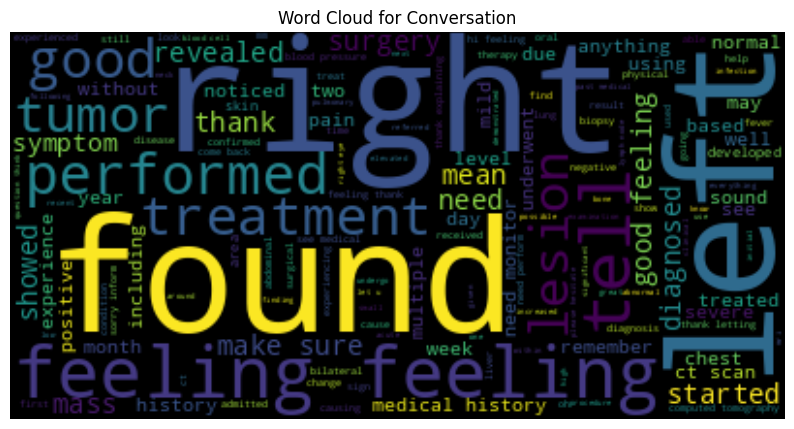

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

text = ' '.join(df['preprocessed_conversation'].dropna())
wordcloud = WordCloud(background_color="black").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear") #displays the word cloud as an image.
plt.title('Word Cloud for Conversation')
plt.axis('off')
plt.show()

#to easily spot the most frequent words, understanding key themes and topics
#identifying recurring words/patterns to check for further processing.

# **Sentiment Analysis using TextBlob**

576     False
45      False
2860    False
2631    False
2233    False
        ...  
75      False
2758    False
1376    False
524     False
1871    False
Name: sentiment, Length: 1000, dtype: bool
Series([], Name: sentiment, dtype: bool)


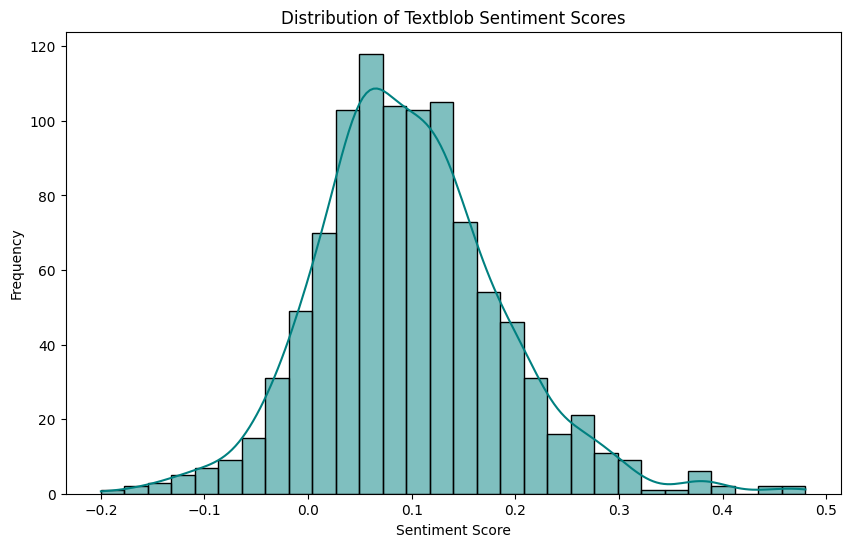

In [ ]:
#!pip install textblob
import textblob as tb
import pandas as pd


def get_sentiment(text):
    text_Sentiment = tb.TextBlob(str(text)).polarity
    text_subjectivity = tb.TextBlob(str(text)).subjectivity
    return text_Sentiment, text_subjectivity

# Apply to the preprocessed column and create new columns for sentiment and subjectivity
df[['sentiment', 'subjectivity']] = df['preprocessed_conversation'].apply(get_sentiment).apply(pd.Series)

#print(df[['preprocessed_conversation', 'sentiment', 'subjectivity']].iloc[12])

print(df.loc[df['sentiment']<=3,'sentiment'] == 0)

print(df.loc[df['sentiment']>3,'sentiment'] == 1)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='teal')
plt.title('Distribution of Textblob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# **Sentiment Analysis using Vader**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


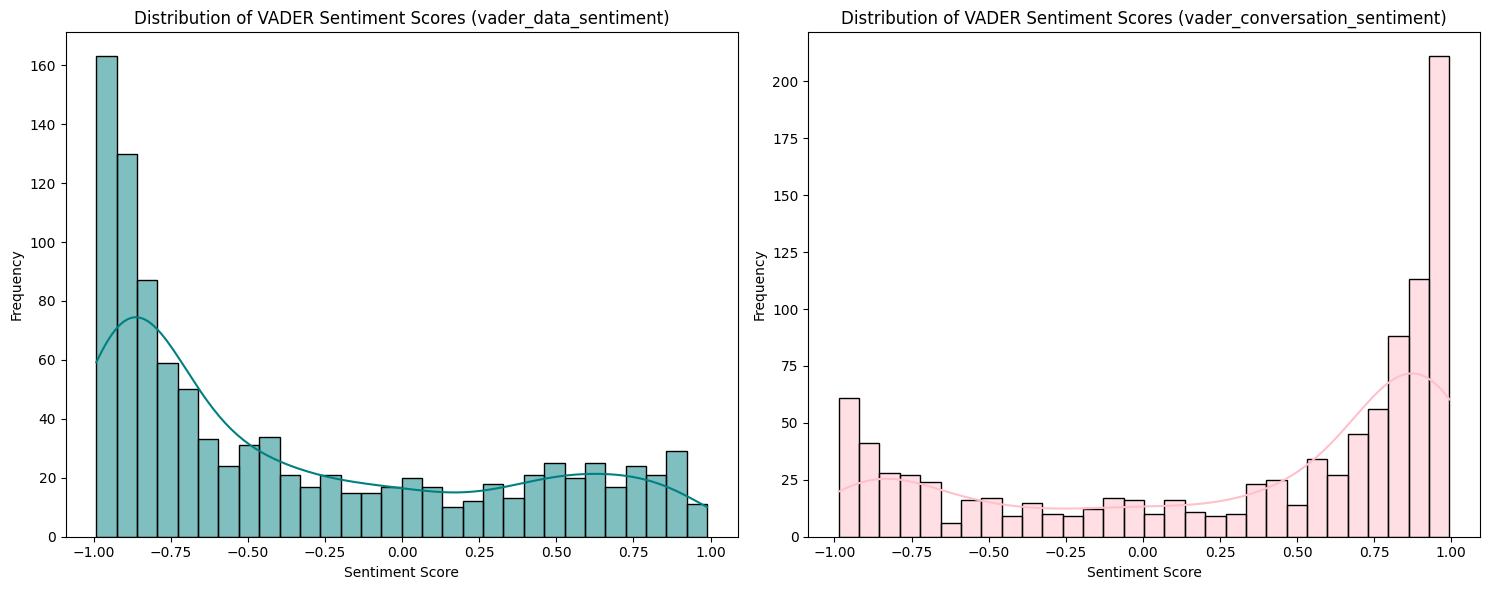

In [ ]:
#!pip install nltk

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

df['vader_data_sentiment'] = df['preprocessed_data'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

df['vader_conversation_sentiment'] = df['preprocessed_conversation'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Display the results
#print(df[['preprocessed_conversation', 'vader_sentiment']].head())

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['vader_data_sentiment'], bins=30, kde=True, color='teal', ax=axes[0])
axes[0].set_title('Distribution of VADER Sentiment Scores (vader_data_sentiment)')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df['vader_conversation_sentiment'], bins=30, kde=True, color='pink', ax=axes[1])
axes[1].set_title('Distribution of VADER Sentiment Scores (vader_conversation_sentiment)')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Sentiment data Distribution:
 predicted_data_sentiment
Negative    704
Positive    264
Neutral      32
Name: count, dtype: int64
Sentiment conversation Distribution:
 predicted_conversation_sentiment
Positive    689
Negative    293
Neutral      18
Name: count, dtype: int64


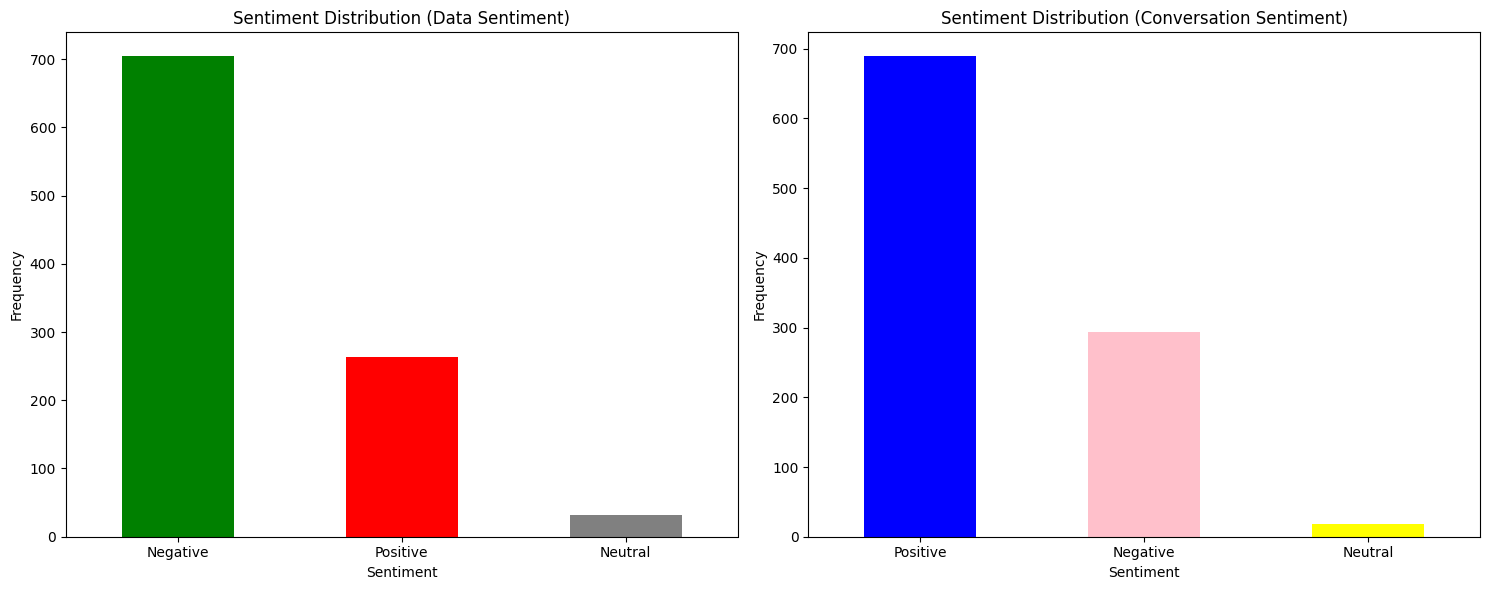

In [ ]:
from sklearn.metrics import classification_report

#VADER scores to sentiment labels
def sentiment_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['predicted_data_sentiment'] = df['vader_data_sentiment'].apply(sentiment_label)
df['predicted_conversation_sentiment'] = df['vader_conversation_sentiment'].apply(sentiment_label)

sentiment_data_distribution = df['predicted_data_sentiment'].value_counts()
sentiment_conversation_distribution = df['predicted_conversation_sentiment'].value_counts()

print("Sentiment data Distribution:\n", sentiment_data_distribution)
print("Sentiment conversation Distribution:\n", sentiment_conversation_distribution)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sentiment_data_distribution.plot(kind='bar', color=['green', 'red', 'gray'], ax=axes[0])
axes[0].set_title('Sentiment Distribution (Data Sentiment)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

sentiment_conversation_distribution.plot(kind='bar', color=['blue', 'pink', 'yellow'], ax=axes[1])
axes[1].set_title('Sentiment Distribution (Conversation Sentiment)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

#print(df[['preprocessed_conversation', 'vader_sentiment', 'predicted_sentiment']].head())


In [ ]:
df.columns

Index(['data', 'conversation', 'conversation_length', 'data_length',
       'sentiment', 'preprocessed_data', 'preprocessed_conversation',
       'subjectivity', 'vader_data_sentiment', 'vader_conversation_sentiment',
       'predicted_data_sentiment', 'predicted_conversation_sentiment'],
      dtype='object')

Most Common Words:
         Word  Frequency
0        also       1385
1        need       1371
2     feeling       1334
3       thank        999
4        left        909
5      showed        909
6       right        886
7        tell        842
8       found        820
9        good        804
10        see        801
11    medical        776
12       test        766
13      blood        750
14  treatment        659
15    symptom        646
16    history        601
17       pain        596
18       mean        550
19   revealed        447


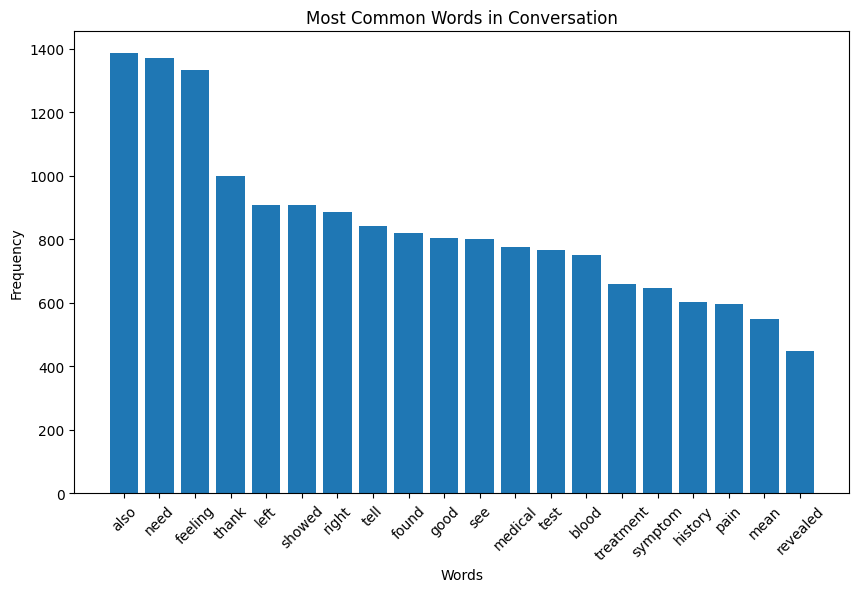

In [ ]:
from collections import Counter

# Flattening the list of keywords from all rows into a single list
all_keywords = [word for sublist in df['preprocessed_conversation'].dropna() for word in sublist.split()]

# Count the frequency of each word using Counter
counter = Counter(all_keywords)

most_common_words = counter.most_common(20)

most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(f"Most Common Words:\n{most_common_df}")

plt.figure(figsize=(10, 6))
plt.bar(most_common_df['Word'], most_common_df['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Most Common Words in Conversation')
plt.show()

In [ ]:
df.columns

Index(['data', 'conversation', 'conversation_length', 'data_length',
       'sentiment', 'preprocessed_data', 'preprocessed_conversation',
       'subjectivity', 'vader_data_sentiment', 'vader_conversation_sentiment',
       'predicted_data_sentiment', 'predicted_conversation_sentiment'],
      dtype='object')

In [ ]:
def extract_age(text):
    match = re.search(r'\b(\d{1,3})[- ]?year[- ]?old\b', text.lower())
    return int(match.group(1)) if match else None

df['age'] = df['data'].apply(extract_age)
print(df['age'])

576     50.0
45      44.0
2860    75.0
2631    20.0
2233     NaN
        ... 
75      27.0
2758    79.0
1376    32.0
524     80.0
1871    89.0
Name: age, Length: 1000, dtype: float64


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

# Download the necessary NLTK package
#nltk.download('punkt')

# Function to separate doctor and patient sentences from a conversation
def separate_conversation(conversation):
    doctor_sentences = []
    patient_sentences = []

    sentences = sent_tokenize(str(conversation))
    for sentence in sentences:
        if sentence.lower().startswith(('doctor:', 'dr:', 'dr.')):  # Identify doctor sentences
            doctor_sentences.append(sentence.replace('Doctor:', '').replace('Dr:', '').replace('Dr.', '').strip())
        else:  # Remaining sentences are assumed to be from the patient
            patient_sentences.append(sentence.replace('Patient:', '').strip())

    return doctor_sentences, patient_sentences

# Apply the function to create two new columns: 'doctor_sentences' and 'patient_sentences'
df[['doctor_sentences', 'patient_sentences']] = df['conversation'].apply(
    lambda x: pd.Series(separate_conversation(x))
)

# Display the first few rows to verify
print(df[ 'patient_sentences'].head())


576                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
import pandas as pd

# Keywords for symptoms and illnesses
symptom_keywords = ['weakness', 'fatigue', 'difficulty in physical therapy', 'tired', 'unable to move', 'chest pain']
illness_keywords = [
    'cancer', 'diabetes', 'hypertension', 'flu', 'asthma', 'heart disease', 'stroke',
    'chronic kidney disease', 'liver disease', 'chronic obstructive pulmonary disease (copd)',
    'pneumonia', 'tuberculosis', 'arthritis', 'anemia', 'depression', 'anxiety',
    'parkinson\'s disease', 'alzheimer\'s disease', 'dementia', 'epilepsy', 'migraine',
    'covid', 'COVID-19','ARDS','respiratory failure','hypoxemia'
]

# Combine both keyword lists for easier management
combined_keywords = symptom_keywords + illness_keywords

# Function to detect any illness or related keyword in the text
def extract_keywords(text, keywords):
    found_keywords = [keyword for keyword in keywords if keyword in text.lower()]
    return ', '.join(found_keywords) if found_keywords else 'No keywords'

# Ensure 'patient_sentences' is a string (if it's a list, join the words)
df['patient_sentences'] = df['patient_sentences'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else str(x)
)

# Detect symptoms and illnesses separately
df['symptoms'] = df['patient_sentences'].apply(lambda x: extract_keywords(x, symptom_keywords))
df['illness'] = df['patient_sentences'].apply(lambda x: extract_keywords(x, illness_keywords))

# Output the updated DataFrame with detected symptoms and illnesses
print(df[['symptoms', 'illness']])


         symptoms                illness
576   No keywords            No keywords
45    No keywords                    flu
2860  No keywords      hypertension, flu
2631  No keywords            No keywords
2233  No keywords            No keywords
...           ...                    ...
75    No keywords            No keywords
2758        tired  flu, stroke, dementia
1376  No keywords                    flu
524   No keywords            No keywords
1871  No keywords            No keywords

[1000 rows x 2 columns]


In [ ]:
# Get the value counts for the illness column
illness_value_counts = df['illness'].value_counts()

# Display the illness value counts
print(illness_value_counts)


illness
No keywords                                                553
flu                                                        105
cancer                                                      68
hypertension                                                25
anemia                                                      22
                                                          ... 
hypertension, flu, chronic kidney disease, tuberculosis      1
diabetes, hypertension, depression                           1
anemia, covid                                                1
hypertension, anxiety, covid                                 1
flu, stroke, dementia                                        1
Name: count, Length: 100, dtype: int64


In [ ]:
# Split the 'illness' column into individual illnesses and gather all unique values
unique_illnesses = (
    df['illness']
    .str.split(', ')  # Split by comma and space
    .explode()  # Expand the lists into individual rows
    .str.strip()  # Remove any extra whitespace
    .drop_duplicates()  # Remove duplicates
    .dropna()  # Drop any NaN values
    .sort_values()  # Sort alphabetically
)

# Convert the result to a list (if needed)
unique_illness_list = unique_illnesses.tolist()

# Display the unique illnesses
print(unique_illness_list)


['No keywords', "alzheimer's disease", 'anemia', 'anxiety', 'arthritis', 'asthma', 'cancer', 'chronic kidney disease', 'covid', 'dementia', 'depression', 'diabetes', 'epilepsy', 'flu', 'heart disease', 'hypertension', 'liver disease', 'migraine', "parkinson's disease", 'pneumonia', 'respiratory failure', 'stroke', 'tuberculosis']


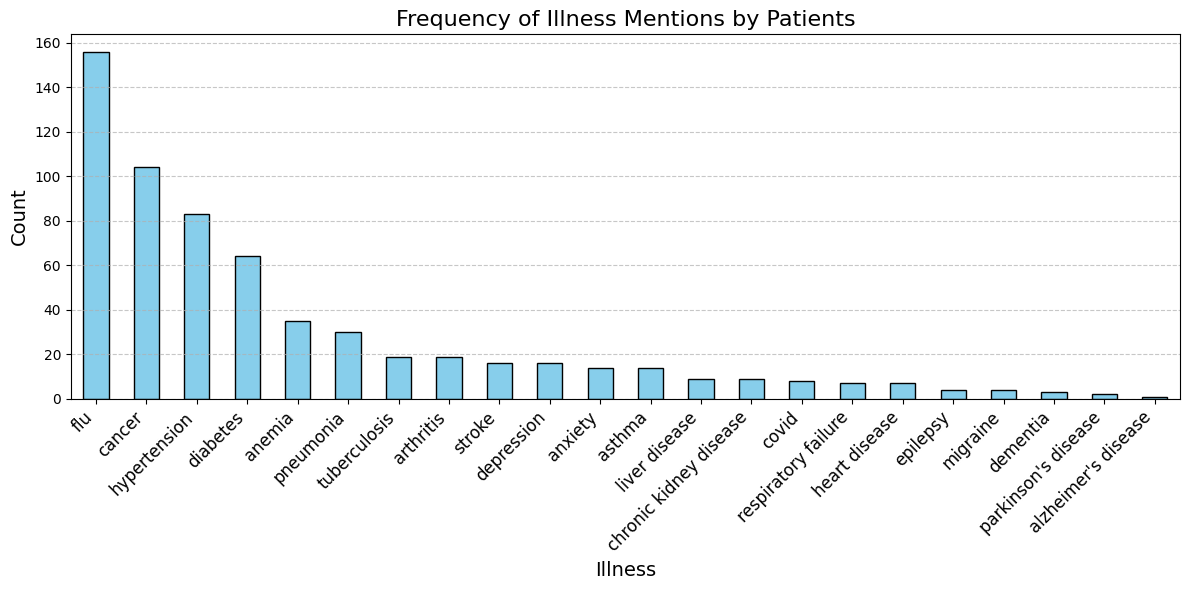

In [ ]:
import matplotlib.pyplot as plt

# Split the 'illness' column into individual illnesses and gather their counts
illness_counts = (
    df['illness']
    .str.split(', ')  # Split by comma and space
    .explode()  # Expand the lists into individual rows
    .str.strip()  # Remove any extra whitespace
    .value_counts()  # Count occurrences
    .sort_values(ascending=False)  # Sort by frequency
)

# Exclude "No Illness"
illness_counts = illness_counts[illness_counts.index != "No keywords"]

# Plot the bar plot
plt.figure(figsize=(12, 6))
illness_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Illness Mentions by Patients', fontsize=16)
plt.xlabel('Illness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


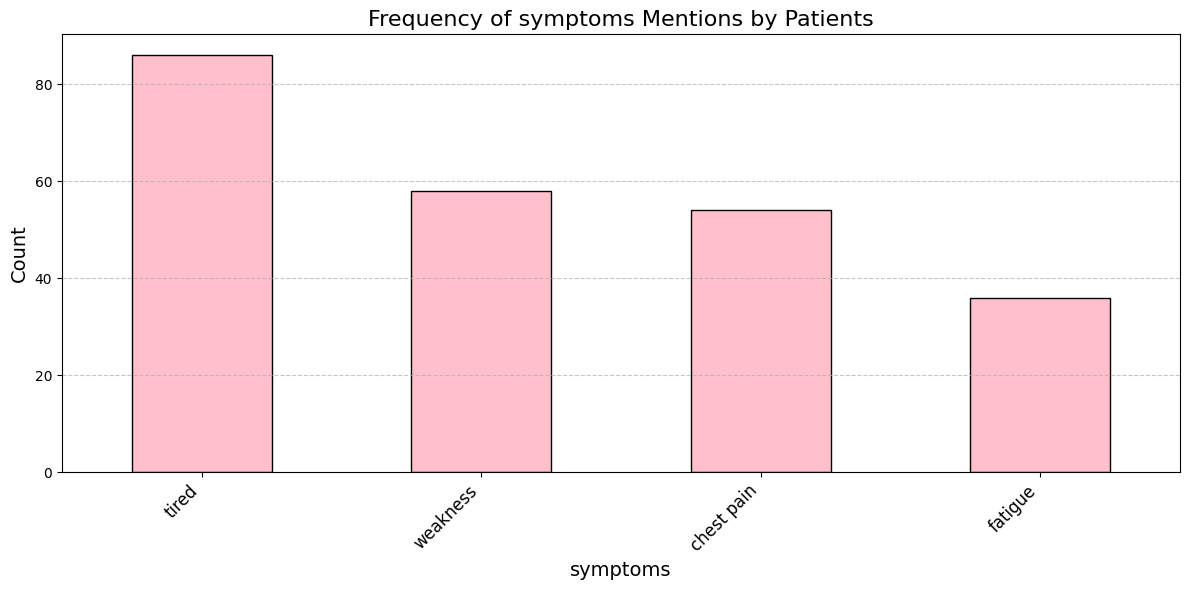

In [ ]:
import matplotlib.pyplot as plt

# Split the 'illness' column into individual illnesses and gather their counts
symptom_counts = (
    df['symptoms']
    .str.split(', ')  # Split by comma and space
    .explode()  # Expand the lists into individual rows
    .str.strip()  # Remove any extra whitespace
    .value_counts()  # Count occurrences
    .sort_values(ascending=False)  # Sort by frequency
)

# Exclude "No Illness"
symptom_counts = symptom_counts[symptom_counts.index != "No keywords"]

# Plot the bar plot
plt.figure(figsize=(12, 6))
symptom_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Frequency of symptoms Mentions by Patients', fontsize=16)
plt.xlabel('symptoms', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Generating FAQs problem statement**

In [ ]:
from collections import Counter

# Function to generate FAQs for a specific disease
def generate_faqs_for_disease(df, disease):
    # Count the occurrences of each illness
    illness_counts = Counter(df['illness'])

    if disease not in illness_counts:
        print(f"{disease} is not present in the dataset.")
        return

    count = illness_counts[disease]

    # Generate diverse FAQs based on the illness
    faq_list = [
        f"How can I manage {disease}? (Mentioned {count} times)",
        f"What are the best treatments for {disease}?",
        f"Can you suggest remedies for {disease}?",
        f"What are the common symptoms of {disease}?",
        f"How can {disease} be prevented?",
        f"What lifestyle changes can help with {disease}?",
        f"Are there any natural treatments for {disease}?",
        f"What foods should be avoided when having {disease}?",
        f"How does {disease} impact my daily life?"
    ]

    # Display the generated FAQs
    for faq in faq_list:
        print(faq)

# Example of using the function
disease = input("Enter a disease to generate FAQs: ")
generate_faqs_for_disease(df, disease)


Enter a disease to generate FAQs: flu
How can I manage flu? (Mentioned 105 times)
What are the best treatments for flu?
Can you suggest remedies for flu?
What are the common symptoms of flu?
How can flu be prevented?
What lifestyle changes can help with flu?
Are there any natural treatments for flu?
What foods should be avoided when having flu?
How does flu impact my daily life?


# **Adherence prediction**

Adherence refers to the extent to which a patient's behavior (in terms of taking medication, following a treatment plan, or adhering to lifestyle recommendations) aligns with the prescribed medical advice.

In [ ]:
import pandas as pd
import pandas as pd
from textblob import TextBlob

# Sentiment analysis function to determine positive/negative sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['Conversation Sentiment'] = df['conversation'].apply(get_sentiment)

def infer_adherence_based_on_sentiment(row):
    sentiment = row['Conversation Sentiment']

    # Classify adherence based on sentiment score
    if sentiment > 0.1:
        return 1  # Adherent
    elif sentiment < 0:
        return 0  # Non-adherent
    else:
        return -1  # Default to adherent for neutral cases

# Apply the function to classify adherence based on sentiment
df['Adherence'] = df.apply(infer_adherence_based_on_sentiment, axis=1)

# Check the updated dataframe
print(df[['Conversation Sentiment', 'Adherence']].head(20))


      Conversation Sentiment  Adherence
576                 0.185227          1
45                  0.167464          1
2860                0.079001         -1
2631                0.151659          1
2233                0.300140          1
2435                0.102405          1
434                 0.025373         -1
2889                0.166414          1
2972                0.007771         -1
2128                0.219861          1
1110                0.198264          1
252                -0.000157          0
697                 0.035606         -1
1060                0.135357          1
2238                0.248506          1
803                 0.166667          1
678                 0.142490          1
161                 0.203307          1
1350                0.020492         -1
1826                0.095217         -1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Handling Categorical Data (illness) - Using LabelEncoder
label_encoder = LabelEncoder()
df['illness_encoded'] = label_encoder.fit_transform(df['illness'])

# Prepare features and target
X = df[['Conversation Sentiment', 'age', 'illness_encoded']]  # Use encoded illness column
y = df['Adherence']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9966666666666667


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score

# Perform Cross-Validation (5-fold cross-validation)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores)}')
print(f'Standard deviation of accuracy: {np.std(cv_scores)}')


Cross-validation accuracy scores: [0.995 0.995 0.995 1.    1.   ]
Mean accuracy: 0.9969999999999999
Standard deviation of accuracy: 0.0024494897427831805


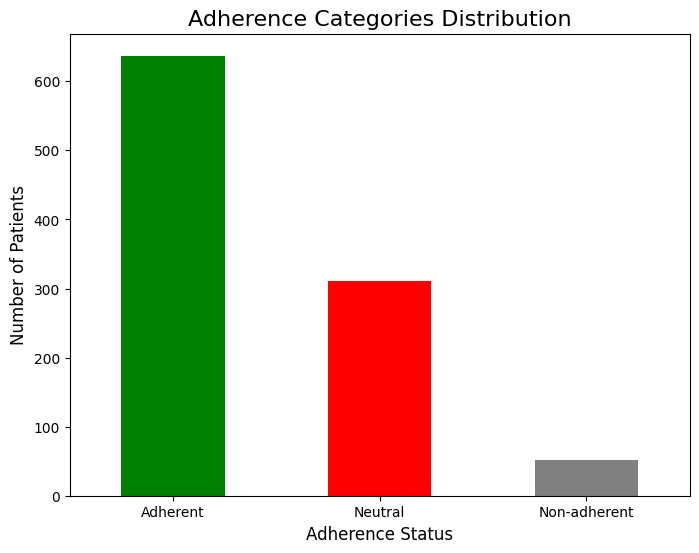

Adherence
Adherent        637
Neutral         311
Non-adherent     52
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each adherence category
adherence_counts = df['Adherence'].value_counts()

# Map adherence values to categories for better readability
adherence_labels = {1: 'Adherent', 0: 'Non-adherent', -1: 'Neutral'}
adherence_counts.index = adherence_counts.index.map(adherence_labels)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
adherence_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Adding labels and title
plt.title('Adherence Categories Distribution', fontsize=16)
plt.xlabel('Adherence Status', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Display the plot
plt.xticks(rotation=0)
plt.show()

# Display the counts
print(adherence_counts)


In [ ]:
#!pip install streamlit pandas matplotlib seaborn wordcloud plotly

In [ ]:
df.to_csv('filtered_columns.csv', index=False)
print("New CSV file saved as 'filtered_columns.csv'")

New CSV file saved as 'filtered_columns.csv'


In [ ]:
!pip install dash plotly pyngrok wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
df.columns

Index(['data', 'conversation', 'conversation_length', 'data_length',
       'sentiment', 'preprocessed_data', 'preprocessed_conversation',
       'subjectivity', 'vader_data_sentiment', 'vader_conversation_sentiment',
       'predicted_data_sentiment', 'predicted_conversation_sentiment', 'age',
       'doctor_sentences', 'patient_sentences', 'symptoms', 'illness',
       'Conversation Sentiment', 'Adherence', 'illness_encoded'],
      dtype='object')

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import io
import base64

# Load your data
df = pd.read_csv('filtered_columns.csv')
df.columns = df.columns.str.strip()
print(df.columns)

# Initialize the Dash app
app = dash.Dash(__name__)

# Check if the necessary columns exist
if 'symptoms' in df.columns and 'illness' in df.columns and 'Adherence' in df.columns:
    # Explicitly filter out 'no keywords' from symptoms and illness
    filtered_df = df[(df['symptoms'] != 'no keywords') & (df['illness'] != 'no keywords')]

    # Symptom and illness counts after filtering
    symptom_counts = filtered_df['symptoms'].value_counts()
    illness_counts = filtered_df['illness'].value_counts()

    # Sentiment distribution
    sentiment_counts = df['predicted_conversation_sentiment'].value_counts()

    # Age distribution
    age_counts = df['age'].value_counts().sort_index()

    # Adherence distribution
    adherence_counts = df['Adherence'].value_counts()

    # App Layout
    app.layout = html.Div([
        html.H1('Healthcare Conversation Dashboard'),

        # Sentiment Analysis Section
        html.Div([
            html.H2('Sentiment Analysis Overview'),
            dcc.Graph(
                id='sentiment-distribution',
                figure=px.pie(sentiment_counts, names=sentiment_counts.index, values=sentiment_counts.values, title="Sentiment Distribution")
            ),
        ]),

        # Symptom and Illness Distribution
        html.Div([
            html.H2('Symptom and Illness Distribution'),
            dcc.Graph(
                id='symptom-counts',
                figure=px.bar(symptom_counts, x=symptom_counts.index, y=symptom_counts.values, title="Symptoms Count")
            ),
            dcc.Graph(
                id='illness-counts',
                figure=px.bar(illness_counts, x=illness_counts.index, y=illness_counts.values, title="Illness Count")
            ),
        ]),

        # Age Distribution
        html.Div([
            html.H2('Age Distribution'),
            dcc.Graph(
                id='age-distribution',
                figure=px.bar(age_counts, x=age_counts.index, y=age_counts.values, title="Age Distribution of Patients")
            ),
        ]),

        # Adherence Distribution
        html.Div([
            html.H2('Adherence Distribution'),
            dcc.Graph(
                id='adherence-distribution',
                figure=px.bar(adherence_counts, x=adherence_counts.index, y=adherence_counts.values, title="Adherence Distribution")
            ),
        ]),

        # Length Analysis
        html.Div([
            html.H2('Length Analysis'),
            dcc.Graph(
                id='length-analysis',
                figure={
                    'data': [
                        go.Histogram(
                            x=df['conversation_length'],
                            name='Conversation Length',
                            opacity=0.6
                        ),
                        go.Histogram(
                            x=df['data_length'],
                            name='Data Length',
                            opacity=0.6
                        )
                    ],
                    'layout': go.Layout(
                        title='Conversation Length vs Data Length',
                        barmode='overlay'
                    )
                }
            ),
        ]),

        # Word Cloud for Conversations
        html.Div([
            html.H2('Word Cloud for Conversations'),
            html.Div(id='wordcloud-conversations')
        ]),

        # Word Cloud for Doctor Sentences
        html.Div([
            html.H2('Word Cloud for Doctor Sentences'),
            html.Div(id='wordcloud-doctor')
        ]),

        # Word Cloud for Patient Sentences
        html.Div([
            html.H2('Word Cloud for Patient Sentences'),
            html.Div(id='wordcloud-patient')
        ]),
    ])

    @app.callback(
        Output('wordcloud-conversations', 'children'),
        Output('wordcloud-doctor', 'children'),
        Output('wordcloud-patient', 'children'),
        Input('wordcloud-conversations', 'id')  # Just a trigger to generate word clouds
    )
    def update_wordclouds(_):
        # Create Word Cloud for Conversations
        wordcloud_conversations = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['conversation'].dropna()))
        wordcloud_doctor = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['doctor_sentences'].dropna()))
        wordcloud_patient = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['patient_sentences'].dropna()))

        # Convert the WordCloud image to a base64 string
        def wc_to_base64(wordcloud):
            img = wordcloud.to_image()
            buf = io.BytesIO()
            img.save(buf, format='PNG')
            img_b64 = base64.b64encode(buf.getvalue()).decode('utf-8')
            return f'data:image/png;base64,{img_b64}'

        # Return the WordClouds as images
        return html.Img(src=wc_to_base64(wordcloud_conversations), style={'width': '100%', 'height': 'auto'}), \
               html.Img(src=wc_to_base64(wordcloud_doctor), style={'width': '100%', 'height': 'auto'}), \
               html.Img(src=wc_to_base64(wordcloud_patient), style={'width': '100%', 'height': 'auto'})

    # Run the app
    if __name__ == '__main__':
        app.run_server(debug=True)

else:
    print("Columns 'symptoms', 'illness', or 'Adherence' not found in the dataset.")


Index(['data', 'conversation', 'conversation_length', 'data_length',
       'sentiment', 'preprocessed_data', 'preprocessed_conversation',
       'subjectivity', 'vader_data_sentiment', 'vader_conversation_sentiment',
       'predicted_data_sentiment', 'predicted_conversation_sentiment', 'age',
       'doctor_sentences', 'patient_sentences', 'symptoms', 'illness',
       'Conversation Sentiment', 'Adherence', 'illness_encoded'],
      dtype='object')


<IPython.core.display.Javascript object>

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import io
import base64
from wordcloud import WordCloud

# Load your data
df = pd.read_csv('filtered_columns.csv')
df.columns = df.columns.str.strip()

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to generate adherence chart
def generate_adherence_chart(data):
    adherence_counts = data['Adherence'].value_counts()

    # Map adherence values to categories for better readability
    adherence_labels = {1: 'Adherent', 0: 'Non-adherent', -1: 'Neutral'}
    adherence_counts.index = adherence_counts.index.map(adherence_labels)

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    adherence_counts.plot(kind='bar', color=['green', 'red', 'gray'])

    # Adding labels and title
    plt.title('Adherence Categories Distribution', fontsize=16)
    plt.xlabel('Adherence Status', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Convert the plot to a PNG image
    img = io.BytesIO()
    plt.savefig(img, format='PNG', bbox_inches='tight')
    img.seek(0)
    plt.close()

    # Encode the PNG image to base64
    return f"data:image/png;base64,{base64.b64encode(img.getvalue()).decode('utf-8')}"

# Function to generate word cloud
def generate_wordcloud(text_data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data.dropna()))
    img = wordcloud.to_image()
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    buf.seek(0)
    return f"data:image/png;base64,{base64.b64encode(buf.getvalue()).decode('utf-8')}"

# Function to generate illness chart
def generate_illness_chart(filtered_data):
    illness_counts = (
        filtered_data['illness']
        .str.split(', ')  # Split by comma and space
        .explode()  # Expand the lists into individual rows
        .str.strip()  # Remove any extra whitespace
        .value_counts()  # Count occurrences
        .sort_values(ascending=False)  # Sort by frequency
    )
    # Exclude "No Illness"
    illness_counts = illness_counts[illness_counts.index != "No Illness"]

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    illness_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Frequency of Illness Mentions by Patients', fontsize=16)
    plt.xlabel('Illness', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Convert the plot to a PNG image
    img = io.BytesIO()
    plt.savefig(img, format='PNG', bbox_inches='tight')
    img.seek(0)
    plt.close()

    # Encode the PNG image to base64
    return f"data:image/png;base64,{base64.b64encode(img.getvalue()).decode('utf-8')}"

# App Layout
app.layout = html.Div([
    html.H1('Healthcare Conversation Dashboard'),

    # Adherence Distribution
    html.Div([
        html.H2('Adherence Categories Distribution'),
        html.Img(id='adherence-chart', style={'width': '100%', 'height': 'auto'})
    ]),

    # Sentiment Analysis Section
    html.Div([
        html.H2('Sentiment Analysis Overview'),
        dcc.Graph(
            id='sentiment-distribution',
            figure=px.pie(df['predicted_conversation_sentiment'].value_counts(),
                          names=df['predicted_conversation_sentiment'].value_counts().index,
                          values=df['predicted_conversation_sentiment'].value_counts().values,
                          title="Sentiment Distribution")
        ),
    ]),

    # Illness Distribution
    html.Div([
        html.H2('Illness Distribution'),
        html.Img(id='illness-chart', style={'width': '100%', 'height': 'auto'})
    ]),

    # Word Cloud for Conversations
    html.Div([
        html.H2('Word Cloud for Conversations'),
        html.Img(id='wordcloud-conversations', style={'width': '100%', 'height': 'auto'})
    ]),
])

# Callbacks for charts
@app.callback(
    Output('adherence-chart', 'src'),
    Input('adherence-chart', 'id')  # Trigger for generating adherence chart
)
def update_adherence_chart(_):
    return generate_adherence_chart(df)

@app.callback(
    Output('illness-chart', 'src'),
    Input('illness-chart', 'id')  # Trigger for generating illness chart
)
def update_illness_chart(_):
    return generate_illness_chart(df)

@app.callback(
    Output('wordcloud-conversations', 'src'),
    Input('wordcloud-conversations', 'id')  # Trigger for generating word cloud
)
def update_wordcloud_conversations(_):
    return generate_wordcloud(df['conversation'])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>